*Eduardus Tjitrahardja | @edutjie | 2022*

# Final Project - Segmentation Self-Driving Car

## Importing Libraries

In [119]:
import os, cv2, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "grey",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    }
)

## Loading Images

In [109]:
train_img_path = glob.glob("images/images_prepped_train/*.png")
test_img_path = glob.glob("images/images_prepped_test/*.png")
train_annot_path = glob.glob("images/annotations_prepped_train/*.png")
test_annot_path = glob.glob("images/annotations_prepped_test/*.png")

print("Train images shape:", len(train_img_path))
print("Test images shape:", len(test_img_path))
print("Train Annotations shape:", len(train_annot_path))
print("Test Annotations shape:", len(test_annot_path))


Train images shape: 367
Test images shape: 101
Train Annotations shape: 367
Test Annotations shape: 101


### Make sure our annotation images has same name with our images

In [112]:
train_img_path[0].split("\\")[1], train_annot_path[0].split("\\")[1]

('0001TP_006690.png', '0001TP_006690.png')

In [114]:
annot_sync = True
for i in range(len(train_img_path)):
    img = train_img_path[i].split("\\")[1]
    annot = train_annot_path[i].split("\\")[1]
    if img != annot:
        annot_sync = False
        print(f"{train_img_path[i]} is not the same with {train_annot_path[i]}")
if annot_sync:
    print("All in sync!")

All in sync!


In [105]:
test_img_path[0].split("/")[2], test_annot_path[0].split("/")[2]

('0016E5_07959.png', '0016E5_07959.png')

In [115]:
annot_sync = True
for i in range(len(test_img_path)):
    img = test_img_path[i].split("\\")[1]
    annot = test_annot_path[i].split("\\")[1]
    if img != annot:
        annot_sync = False
        print(f"{test_img_path[i]} is not the same with {test_annot_path[i]}")
if annot_sync:
    print("All in sync!")

All in sync!


## Collecting Images

In [121]:
def collect_images(paths):
    images = []
    for path in paths:
        images.append(cv2.imread(path))
    return np.array(images)

In [122]:
train_img = collect_images(train_img_path)
test_img = collect_images(test_img_path)
train_annot = collect_images(train_annot_path)
test_annot = collect_images(test_annot_path)

print("Train images shape:", train_img.shape)
print("Test images shape:", test_img.shape)
print("Train Annotations shape:", train_annot.shape)
print("Test Annotations shape:", test_annot.shape)

Train images shape: (367, 360, 480, 3)
Test images shape: (101, 360, 480, 3)
Train Annotations shape: (367, 360, 480, 3)
Test Annotations shape: (101, 360, 480, 3)


## Inspecting Image

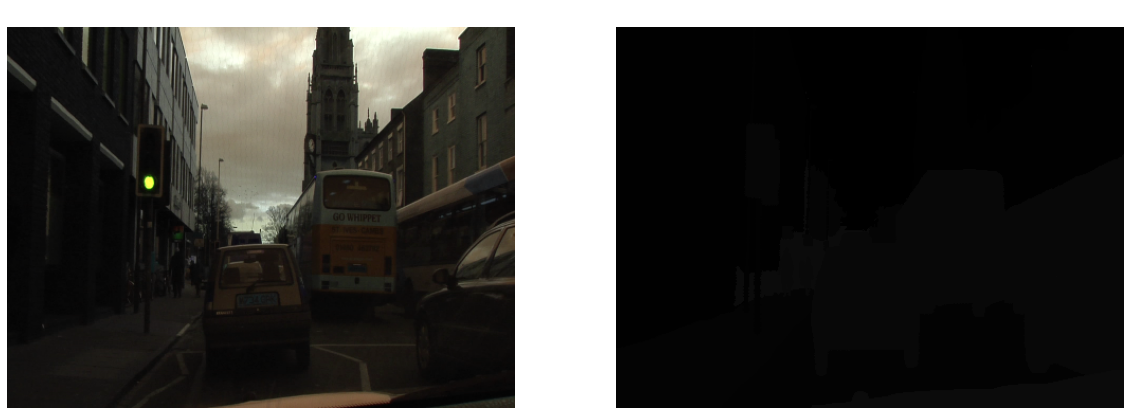

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title("Image", fontsize=20)
ax[0].imshow(train_img[0])
ax[1].set_title("Recolored Annotation", fontsize=20)
ax[1].imshow(train_annot[0])
ax[0].axis("off")
ax[1].axis("off")

plt.show()

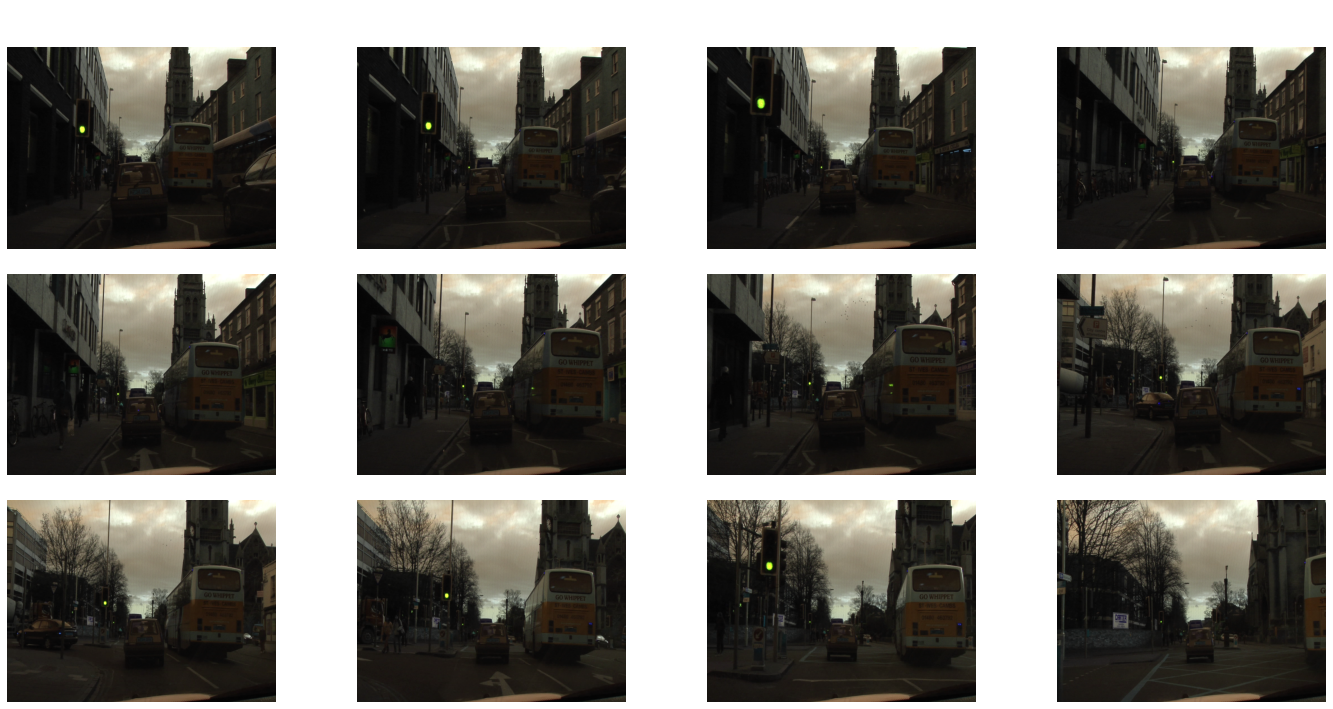

In [126]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_img[i])
    ax.set_title(train_img_path[i].split("\\")[1])
    ax.axis("off")

fig.suptitle("Train images", fontsize=20)
fig.tight_layout()
plt.show()

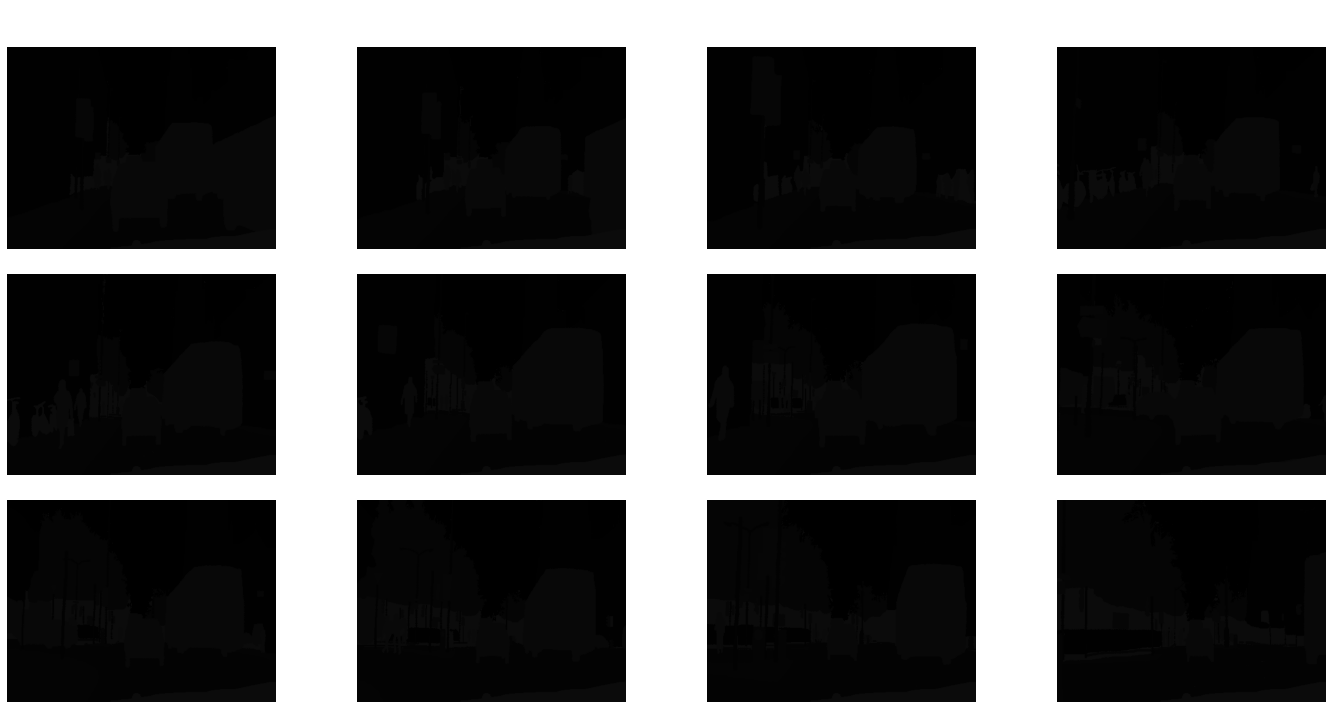

In [127]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_annot[i])
    ax.set_title(train_annot_path[i].split("\\")[1])
    ax.axis("off")

fig.suptitle("Train Annotations", fontsize=20)
fig.tight_layout()
plt.show()

In [128]:
print("Image shape:", train_img[0].shape)
print("Annotations shape:", train_annot[0].shape)

Image shape: (360, 480, 3)
Annotations shape: (360, 480, 3)


### Inspect Image Values

In [133]:
train_img[0][0]

array([[16, 16, 16],
       [16, 16, 16],
       [12, 12, 12],
       ...,
       [20, 19, 15],
       [20, 18, 17],
       [22, 18, 17]], dtype=uint8)

In [134]:
np.unique(train_img[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Inspect Annotation Values

In [136]:
train_annot[0][0]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [137]:
np.unique(train_annot[0])

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

**Notes:**
- 0 is a background (everything that not belong to target class --> black color)
- There are 11 label classes + 1 Background class in this dataset.
- 11 Label Classes are:
  - Sky
  - Building
  - Pole
  - Road
  - Pavement
  - Tree
  - SignSymbol
  - Fence
  - Car
  - Pedestrian
  - Bicyclist

### Recolor Annotations

In [138]:
class_colors = [
    (128, 0, 0),
    (170, 110, 40),
    (128, 128, 0),
    (0, 128, 128),
    (0, 0, 128),
    (230, 25, 75),
    (245, 130, 48),
    (255, 255, 25),
    (210, 245, 60),
    (240, 50, 230),
    (128, 128, 128),
    (220, 190, 255),
    (255, 215, 180),
    (70, 140, 240),
    (0, 130, 200),
]

In [139]:
def recolor_annot(seg, colors, n_classes):
    recolored_seg = np.zeros_like(seg)

    for n in range(n_classes):
        for i in range(3):
            recolored_seg[:, :, i] += ((seg[:, :, 0] == n) * colors[n][i]).astype('uint8')

    return recolored_seg

In [140]:
recolored_seg = recolor_annot(train_annot[0], class_colors, 12)

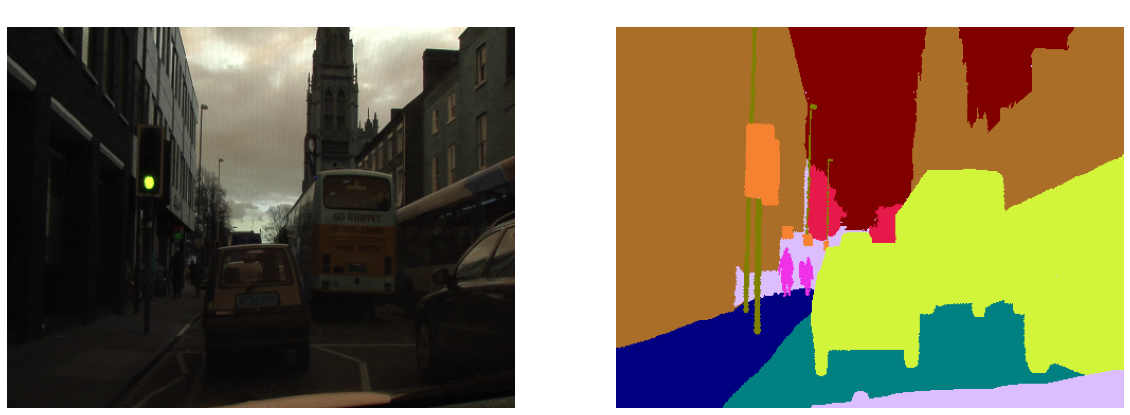

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title("Image", fontsize=20)
ax[0].imshow(train_img[0])
ax[1].set_title("Recolored Annotation", fontsize=20)
ax[1].imshow(recolored_seg)
ax[0].axis("off")
ax[1].axis("off")

plt.show()

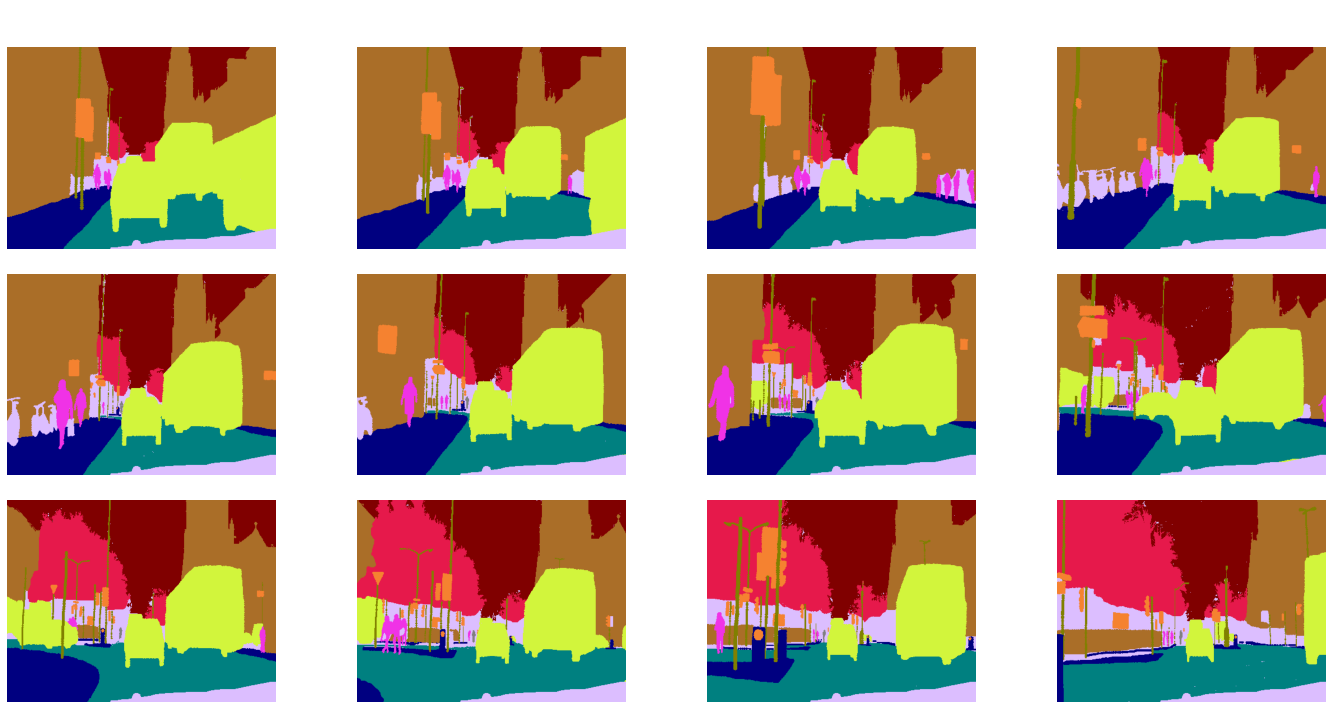

In [147]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(recolor_annot(train_annot[i], class_colors, 12))
    ax.set_title(train_annot_path[i].split("\\")[1])
    ax.axis("off")

fig.suptitle("Train Annotations", fontsize=20)
fig.tight_layout()
plt.show()